In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from tensorflow.keras.regularizers import l1, l2
from keras.optimizers import Adam ,SGD
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, LSTM, Dropout, Flatten ,Reshape ,Bidirectional,Activation, Add,Layer,add,GlobalAveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, BatchNormalization, Reshape
from keras import backend as K
import os
from keras.metrics import MeanAbsoluteError, MeanSquaredError
from tensorflow.keras.layers import MultiHeadAttention
from tensorflow.keras.layers import Input, MultiHeadAttention, LSTM, Dense, Flatten, BatchNormalization, Reshape
from tensorflow.keras.models import Model
import torch
import torch.nn as nn
import torch.optim as optim  # 导入优化器模块
import torch.nn.functional as F
from tensorflow.keras.layers import MultiHeadAttention,TimeDistributed
from tensorflow.keras.layers import Input, MultiHeadAttention, LSTM, Dense, Flatten, BatchNormalization, Reshape
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, Dense, Flatten, Concatenate, Add
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling1D
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '5'

2024-08-08 13:52:29.429470: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-08 13:52:29.469822: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-08 13:52:30.236879: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data=pd.read_csv('ethylene_methane.csv')
features = data[['TGS2602-1', 'TGS2602-2', 'TGS2600-1', 'TGS2600-2', 
                 'TGS2610-1', 'TGS2610-2', 'TGS2620-1', 'TGS2620-2',
                 'TGS2602-3', 'TGS2602-4', 'TGS2600-3', 'TGS2600-4', 
                 'TGS2610-3', 'TGS2610-4', 'TGS2620-3', 'TGS2620-4']]
targets = data[['Methane conc (ppm)']]
# 划分训练集和测试集，测试集占比20%
#X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42,shuffle=False)
# 从X_train和y_train中划分出验证集，验证集占比25%（即训练集的1/4）
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42,shuffle=False)
# 划分训练集和测试集，测试集占比20%
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)
# 从X_train和y_train中划分出验证集，验证集占比25%（即训练集的1/4）
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [4]:
def residual_block(x, filters, kernel_size=3, strides=1, activation='relu'):
    """定义一个残差块"""
    # 保存输入以用于残差连接
    residual = x

    # 卷积层1
    x = Conv1D(filters=filters, kernel_size=kernel_size, strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation(activation)(x)

    # 卷积层2
    x = Conv1D(filters=filters, kernel_size=kernel_size, strides=1, padding='same')(x)
    x = BatchNormalization()(x)

    # 残差连接
    x = add([x, residual])  # 将原始输入添加到第二个卷积层的输出
    x = Activation(activation)(x)  # 非线性激活函数

    return x

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, BatchNormalization, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model

def build_dual_stream_network(input_shape, num_heads=8, d_model=512):
    # 定义多头注意力层
    attention_layer = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)

    # 第一个流
    input1 = Input(shape=input_shape)
    x1 = Conv1D(filters=256, kernel_size=5, activation='relu')(input1)
    x1 = MaxPooling1D(pool_size=2)(x1)
    x1 = Conv1D(filters=256, kernel_size=5, activation='relu')(x1)
    x1 = MaxPooling1D(pool_size=2)(x1)
    x1 = BatchNormalization()(x1)
    x1 = Flatten()(x1)
    x1 = Dense(d_model, activation='relu')(x1)  # 调整维度以匹配多头注意力层

    x1 = Reshape((1, d_model))(x1)

# 添加多头注意力层
    x1 = MultiHeadAttention(num_heads=8, key_dim=d_model)(x1, x1)

    # 第二个流
    input2 = Input(shape=input_shape)
    x2 = Conv1D(filters=256, kernel_size=3, activation='relu')(input2)
    x2 = MaxPooling1D(pool_size=2)(x2)
    x2 = Conv1D(filters=256, kernel_size=3, activation='relu')(x2)
    x2 = MaxPooling1D(pool_size=2)(x2)
    x2 = residual_block(x2, filters=256)
    x2 = BatchNormalization()(x2)
    x2 = Flatten()(x2)
    x2 = Dense(d_model, activation='relu')(x2)  # 调整维度以匹配多头注意力层

    x2 = Reshape((1, d_model))(x2)

# 添加多头注意力层
    x2 = MultiHeadAttention(num_heads=8, key_dim=d_model)(x2, x2)

    # 合并特征
    merged = Concatenate()([x1, x2])

    # 全连接层
    x = Dense(512, activation='relu')(merged)
    x = Dense(256, activation='relu')(x)
    output = Dense(1, activation=None)(x)
    model = Model(inputs=[input1, input2], outputs=output)
    return model

# 使用构建的函数创建模型
model = build_dual_stream_network((16,1 ))

2024-08-08 13:52:39.712426: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-08 13:52:39.713317: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-08 13:52:39.713488: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [6]:
model.summary()

# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error')

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 16, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 14, 256)   │      1,024 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 7, 256)    │          0 │ conv1d_2[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 5, 256)    │    196,864 │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_3     │ (None, 2, 256)    │          0 │ conv1d_3[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 2, 256)    │    196,864 │ max_pooling1d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 2, 256)    │      1,024 │ conv1d_4[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer         │ (None, 16, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 2, 256)    │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 12, 256)   │      1,536 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 2, 256)    │    196,864 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 6, 256)    │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 2, 256)    │      1,024 │ conv1d_5[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 2, 256)    │    327,936 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 2, 256)    │          0 │ batch_normalizat… │
│                     │                   │            │ max_pooling1d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 1, 256)    │          0 │ conv1d_1[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 2, 256)    │          0 │ add[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 1, 256)    │      1,024 │ max_pooling1d_1[… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 2, 256)    │      1,024 │ activation_1[0][

 Total params: 18,778,625 (71.63 MB)

 Trainable params: 18,776,577 (71.63 MB)

 Non-trainable params: 2,048 (8.00 KB)

In [7]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, min_lr=0.0000001, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
history = model.fit(
    [X_train_scaled,X_train_scaled], y_train,
    epochs=5000,
    batch_size=1024,
    validation_data=([X_val_scaled,X_val_scaled], y_val),
    callbacks=[early_stopping, reduce_lr],  # 添加回调函数
    #callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5000


/usr/local/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 8, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
I0000 00:00:1723096367.390279     770 service.cc:145] XLA service 0x7f43a0020020 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1723096367.390308     770 service.cc:153]   StreamExecutor device (0): NVIDIA A10, Compute Capability 8.6
2024-08-08 13:52:47.506644: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-08 13:52:49.306372: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8902
I0000 00:00:1723096369.894492     804 asm_compiler.cc:369] ptxas warning : Registers are

  16/2449 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - loss: 8104.8628

I0000 00:00:1723096389.724575     770 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2447/2449 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1603.2451

I0000 00:00:1723096416.194361    1046 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_54', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1723096416.942075    1048 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_9', 468 bytes spill stores, 276 bytes spill loads

I0000 00:00:1723096417.163453    1051 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_54', 224 bytes spill stores, 232 bytes spill loads

I0000 00:00:1723096417.553437    1047 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_9', 28 bytes spill stores, 20 bytes spill loads

I0000 00:00:1723096418.749369    1050 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_9', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1723096420.405410    1047 asm_c

2449/2449 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1602.9280

/usr/local/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 8, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
I0000 00:00:1723096432.551426    1219 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot', 456 bytes spill stores, 408 bytes spill loads

I0000 00:00:1723096433.214434    1220 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_2', 456 bytes spill stores, 408 bytes spill loads

I0000 00:00:1723096433.570437    1223 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot', 172 bytes spill stores, 172 bytes spill loads

I0000 00:00:1723096434.329614    1225 asm_compiler.cc:369] ptxas warning : Registers are spilled to lo

2449/2449 ━━━━━━━━━━━━━━━━━━━━ 79s 21ms/step - loss: 1602.7697 - val_loss: 1503.3687 - learning_rate: 0.0010
Epoch 2/5000
2449/2449 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - loss: 877.3492 - val_loss: 863.2471 - learning_rate: 0.0010
Epoch 3/5000
2449/2449 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - loss: 721.5901 - val_loss: 609.2978 - learning_rate: 0.0010
Epoch 4/5000
2449/2449 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - loss: 637.4713 - val_loss: 621.7278 - learning_rate: 0.0010
Epoch 5/5000
2449/2449 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - loss: 591.7607 - val_loss: 642.0242 - learning_rate: 0.0010
Epoch 6/5000
2446/2449 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 567.0847
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.000800000037997961.
2449/2449 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - loss: 567.0692 - val_loss: 616.5069 - learning_rate: 0.0010
Epoch 7/5000
2449/2449 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - loss: 514.4641 - val_loss: 528.2804 - learning_rate: 8.0000e-04
Epoch 8/5000
2449/2449 ━━━━━━━━

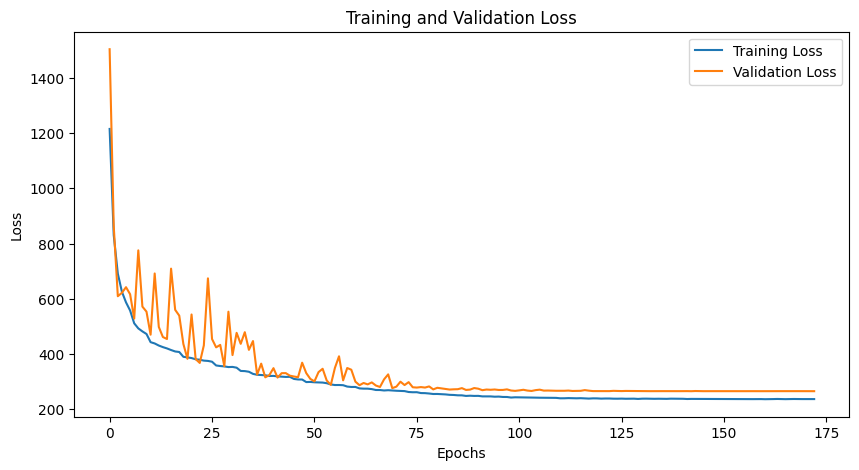

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
model.save('dual-cnn-att-residuals-large.h5')

In [10]:
model=tf.keras.models.load_model('dual-cnn-att-residuals-large.h5')

In [11]:
predictions = model.predict([X_test_scaled,X_test_scaled])

/usr/local/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 8, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


26116/26116 ━━━━━━━━━━━━━━━━━━━━ 40s 1ms/step


In [12]:
reshaped_array = predictions.reshape(835701, -1)

In [13]:
# 计算MSE和RMSE
mse = mean_squared_error(y_test, reshaped_array)
rmse = np.sqrt(mse)

# 计算MAE
mae = mean_absolute_error(y_test, reshaped_array)

print(f"Test MSE: {mse}")
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print('R2 Score:', r2_score(y_test, reshaped_array))

Test MSE: 267.24236716454226
Test RMSE: 16.347549270901197
Test MAE: 3.5425449446879007
R2 Score: 0.9545512199401855


In [ ]:
import time
# 推理（预测）时间
start_predict_time = time.time()

predictions = model.predict([X_test_scaled, X_test_scaled])

# 计算总推理时间
end_predict_time = time.time()
total_predict_time = end_predict_time - start_predict_time
print(f"Total inference (prediction) time: {total_predict_time:.2f} seconds")

# 计算平均推理时间
num_predictions = len(predictions) 
average_predict_time = total_predict_time / num_predictions
print(f"Average inference (prediction) time per sample: {average_predict_time:.5f} seconds")

26116/26116 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step
Total inference (prediction) time: 40.83 seconds
Average inference (prediction) time per sample: 0.00005 seconds
